In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
#DEFINE DATA

In [4]:
df_customer = pd.read_csv(r'Case Study - Customer.csv', delimiter = ';')
df_customer.head()

CustomerID  Age  Gender Marital Status Income
0           1   55       1        Married   5,12
1           2   60       1        Married   6,23
2           3   32       1        Married   9,17
3           4   31       1        Married   4,87
4           5   58       1        Married   3,57

In [9]:
df_product = pd.read_csv(r'Case Study - Product.csv', delimiter = ';')
df_product.head()

ProductID   Product Name  Price
0        P1      Choco Bar   8800
1        P2  Ginger Candy    3200
2        P3       Crackers   7500
3        P4    Potato Chip  12000
4        P5       Thai Tea   4200

In [5]:
df_store = pd.read_csv(r'Case Study - Store.csv', delimiter = ';')
df_store.head()

StoreID         StoreName GroupStore           Type   Latitude   Longitude
0        1     Prima Tendean      Prima   Modern Trade       -6,2  106,816666
1        2  Prima Kelapa Dua      Prima   Modern Trade  -6,914864  107,608238
2        3        Prima Kota      Prima   Modern Trade  -7,797068  110,370529
3        4       Gita Ginara       Gita  General Trade  -6,966667  110,416664
4        5           Bonafid       Gita  General Trade  -7,250445  112,768845

In [6]:
df_transaction = pd.read_csv(r'Case Study - Transaction.csv', delimiter = ';')
df_transaction.head()

TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
0       TR11369         328  01/01/2022        P3   7500    4        30000   
1       TR16356         165  01/01/2022        P9  10000    7        70000   
2        TR1984         183  01/01/2022        P1   8800    4        35200   
3       TR35256         160  01/01/2022        P1   8800    7        61600   
4       TR41231         386  01/01/2022        P9  10000    1        10000   

   StoreID  
0       12  
1        1  
2        4  
3        4  
4        4

In [10]:
df_customer.shape, df_product.shape, df_store.shape, df_transaction.shape

((447, 5), (10, 3), (14, 6), (5020, 8))

In [8]:
#DATA CLEANSING

In [11]:
#cleansing df_customer
df_customer['Income'] = df_customer['Income'].replace('[,]','.', regex=True).astype('float')

In [12]:
#cleansing df_store
df_store['Latitude'] = df_store['Latitude'].replace('[,]','.', regex=True).astype('float')
df_store['Longitude'] = df_store['Longitude'].replace('[,]','.', regex=True).astype('float')

In [13]:
#cleansing df_transaction
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

In [14]:
df_merge = pd.merge(df_transaction, df_customer, on=['CustomerID'])
df_merge = pd.merge(df_merge, df_product.drop(columns=['Price']), on=['ProductID'])
df_merge = pd.merge(df_merge, df_store, on=['StoreID'])

In [15]:
df_merge.head()

TransactionID  CustomerID       Date ProductID  Price  Qty  TotalAmount  \
0       TR11369         328 2022-01-01        P3   7500    4        30000   
1       TR89318         183 2022-07-17        P3   7500    1         7500   
2        TR9106         123 2022-09-26        P3   7500    4        30000   
3        TR4331         335 2022-08-01        P3   7500    3        22500   
4        TR6445         181 2022-10-01        P3   7500    4        30000   

   StoreID  Age  Gender Marital Status  Income Product Name       StoreName  \
0       12   36       0        Married   10.53     Crackers  Prestasi Utama   
1       12   27       1         Single    0.18     Crackers  Prestasi Utama   
2       12   34       0        Married    4.36     Crackers  Prestasi Utama   
3       12   29       1         Single    4.74     Crackers  Prestasi Utama   
4       12   33       1        Married    9.94     Crackers  Prestasi Utama   

  GroupStore           Type  Latitude   Longitude  
0   Prestasi  General Trade -2.990934  104.756554  
1   Prestasi  General Trade -2.990934  104.756554  
2   Prestasi  General Trade -2.990934  104.756554  
3   Prestasi  General Trade -2.990934  104.756554  
4   Prestasi  General Trade -2.990934  104.756554

In [16]:
#model machine learning regresi

In [17]:
df_regresi = df_merge.groupby(['Date']).agg({
                               'Qty' : 'sum'
                               }).reset_index()

In [18]:
df_regresi

Date  Qty
0   2022-01-01   49
1   2022-01-02   50
2   2022-01-03   76
3   2022-01-04   98
4   2022-01-05   67
5   2022-01-06   67
6   2022-01-07   99
7   2022-01-08   56
8   2022-01-09   27
9   2022-01-10   85
10  2022-01-11   66
11  2022-01-12   81
12  2022-01-13   28
13  2022-01-14   31
14  2022-01-15  102
15  2022-01-16   33
16  2022-01-17   77
17  2022-01-18   37
18  2022-01-19   49
19  2022-01-20   40
20  2022-01-21   60
21  2022-01-22   32
22  2022-01-23   37
23  2022-01-24   55
24  2022-01-25   60
25  2022-01-26   49
26  2022-01-27   66
27  2022-01-28   43
28  2022-01-29   35
29  2022-01-30   49
30  2022-01-31   59
31  2022-02-01   59
32  2022-02-02   54
33  2022-02-03  119
34  2022-02-04   53
35  2022-02-05   57
36  2022-02-06   57
37  2022-02-07   50
38  2022-02-08   61
39  2022-02-09   67
40  2022-02-10   59
41  2022-02-11   40
42  2022-02-12   30
43  2022-02-13   38
44  2022-02-14   49
45  2022-02-15   52
46  2022-02-16   55
47  2022-02-17   47
48  2022-02-18   45
49  2022-02-19   41
50  2022-02-20   22
51  2022-02-21   53
52  2022-02-22   49
53  2022-02-23   75
54  2022-02-24   33
55  2022-02-25   36
56  2022-02-26   91
57  2022-02-27   76
58  2022-02-28   56
59  2022-03-01   63
60  2022-03-02   58
61  2022-03-03  100
62  2022-03-04   23
63  2022-03-05   31
64  2022-03-06   49
65  2022-03-07   56
66  2022-03-08   22
67  2022-03-09   48
68  2022-03-10   43
69  2022-03-11   34
70  2022-03-12   48
71  2022-03-13   45
72  2022-03-14   43
73  2022-03-15   50
74  2022-03-16   41
75  2022-03-17   81
76  2022-03-18   54
77  2022-03-19   42
78  2022-03-20   33
79  2022-03-21   27
80  2022-03-22   32
81  2022-03-23   59
82  2022-03-24   63
83  2022-03-25   54
84  2022-03-26   64
85  2022-03-27   43
86  2022-03-28   45
87  2022-03-29   68
88  2022-03-30   76
89  2022-03-31   56
90  2022-04-01   45
91  2022-04-02   62
92  2022-04-03   64
93  2022-04-04   76
94  2022-04-05   29
95  2022-04-06   34
96  2022-04-07   40
97  2022-04-08   30
98  2022-04-09   55
99  2022-04-10   59
100 2022-04-11   28
101 2022-04-12   63
102 2022-04-13   65
103 2022-04-14   40
104 2022-04-15   28
105 2022-04-16   60
106 2022-04-17   46
107 2022-04-18   26
108 2022-04-19   55
109 2022-04-20   49
110 2022-04-21   48
111 2022-04-22   52
112 2022-04-23   37
113 2022-04-24   51
114 2022-04-25   58
115 2022-04-26   48
116 2022-04-27   41
117 2022-04-28   82
118 2022-04-29   55
119 2022-04-30   21
120 2022-05-01   30
121 2022-05-02   47
122 2022-05-03   29
123 2022-05-04   63
124 2022-05-05   41
125 2022-05-06   83
126 2022-05-07   47
127 2022-05-08   47
128 2022-05-09   46
129 2022-05-10   67
130 2022-05-11   48
131 2022-05-12   33
132 2022-05-13   37
133 2022-05-14   74
134 2022-05-15   71
135 2022-05-16   36
136 2022-05-17   69
137 2022-05-18   58
138 2022-05-19   76
139 2022-05-20   52
140 2022-05-21   56
141 2022-05-22   40
142 2022-05-23   15
143 2022-05-24   45
144 2022-05-25   56
145 2022-05-26   79
146 2022-05-27   18
147 2022-05-28   67
148 2022-05-29   35
149 2022-05-30   57
150 2022-05-31   21
151 2022-06-01   71
152 2022-06-02   51
153 2022-06-03   56
154 2022-06-04   45
155 2022-06-05   50
156 2022-06-06   46
157 2022-06-07   48
158 2022-06-08   38
159 2022-06-09   18
160 2022-06-10   30
161 2022-06-11   49
162 2022-06-12   41
163 2022-06-13   30
164 2022-06-14   49
165 2022-06-15   43
166 2022-06-16   47
167 2022-06-17   65
168 2022-06-18   58
169 2022-06-19   50
170 2022-06-20   37
171 2022-06-21   40
172 2022-06-22   66
173 2022-06-23   52
174 2022-06-24   62
175 2022-06-25   73
176 2022-06-26   64
177 2022-06-27   65
178 2022-06-28   42
179 2022-06-29   40
180 2022-06-30   27
181 2022-07-01   37
182 2022-07-02   32
183 2022-07-03   79
184 2022-07-04   48
185 2022-07-05   72
186 2022-07-06   63
187 2022-07-07   67
188 2022-07-08   49
189 2022-07-09   41
190 2022-07-10   56
191 2022-07-11   39
192 2022-07-12   35
193 2022-07-13   56
194 2022-07-14   29
195 2022-07-15   44
196 2022-07-16   49
197 2022-07-17   41
198 2022-07-18   70
199 2022-0

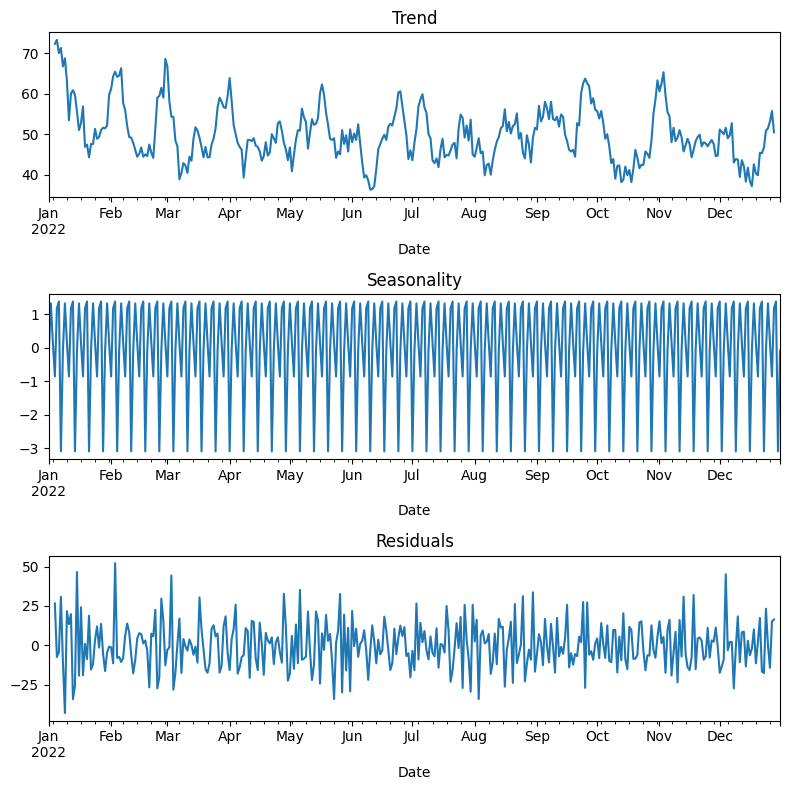

In [19]:
decomposed = seasonal_decompose(df_regresi.set_index('Date'))

plt.figure(figsize=(8, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

In [20]:
cut_off = round(df_regresi.shape[0] * 0.9)
df_train = df_regresi[:cut_off]
df_test = df_regresi[cut_off:].reset_index(drop=True)
df_train.shape, df_test.shape

((328, 2), (37, 2))

In [21]:
df_train

Date  Qty
0   2022-01-01   49
1   2022-01-02   50
2   2022-01-03   76
3   2022-01-04   98
4   2022-01-05   67
5   2022-01-06   67
6   2022-01-07   99
7   2022-01-08   56
8   2022-01-09   27
9   2022-01-10   85
10  2022-01-11   66
11  2022-01-12   81
12  2022-01-13   28
13  2022-01-14   31
14  2022-01-15  102
15  2022-01-16   33
16  2022-01-17   77
17  2022-01-18   37
18  2022-01-19   49
19  2022-01-20   40
20  2022-01-21   60
21  2022-01-22   32
22  2022-01-23   37
23  2022-01-24   55
24  2022-01-25   60
25  2022-01-26   49
26  2022-01-27   66
27  2022-01-28   43
28  2022-01-29   35
29  2022-01-30   49
30  2022-01-31   59
31  2022-02-01   59
32  2022-02-02   54
33  2022-02-03  119
34  2022-02-04   53
35  2022-02-05   57
36  2022-02-06   57
37  2022-02-07   50
38  2022-02-08   61
39  2022-02-09   67
40  2022-02-10   59
41  2022-02-11   40
42  2022-02-12   30
43  2022-02-13   38
44  2022-02-14   49
45  2022-02-15   52
46  2022-02-16   55
47  2022-02-17   47
48  2022-02-18   45
49  2022-02-19   41
50  2022-02-20   22
51  2022-02-21   53
52  2022-02-22   49
53  2022-02-23   75
54  2022-02-24   33
55  2022-02-25   36
56  2022-02-26   91
57  2022-02-27   76
58  2022-02-28   56
59  2022-03-01   63
60  2022-03-02   58
61  2022-03-03  100
62  2022-03-04   23
63  2022-03-05   31
64  2022-03-06   49
65  2022-03-07   56
66  2022-03-08   22
67  2022-03-09   48
68  2022-03-10   43
69  2022-03-11   34
70  2022-03-12   48
71  2022-03-13   45
72  2022-03-14   43
73  2022-03-15   50
74  2022-03-16   41
75  2022-03-17   81
76  2022-03-18   54
77  2022-03-19   42
78  2022-03-20   33
79  2022-03-21   27
80  2022-03-22   32
81  2022-03-23   59
82  2022-03-24   63
83  2022-03-25   54
84  2022-03-26   64
85  2022-03-27   43
86  2022-03-28   45
87  2022-03-29   68
88  2022-03-30   76
89  2022-03-31   56
90  2022-04-01   45
91  2022-04-02   62
92  2022-04-03   64
93  2022-04-04   76
94  2022-04-05   29
95  2022-04-06   34
96  2022-04-07   40
97  2022-04-08   30
98  2022-04-09   55
99  2022-04-10   59
100 2022-04-11   28
101 2022-04-12   63
102 2022-04-13   65
103 2022-04-14   40
104 2022-04-15   28
105 2022-04-16   60
106 2022-04-17   46
107 2022-04-18   26
108 2022-04-19   55
109 2022-04-20   49
110 2022-04-21   48
111 2022-04-22   52
112 2022-04-23   37
113 2022-04-24   51
114 2022-04-25   58
115 2022-04-26   48
116 2022-04-27   41
117 2022-04-28   82
118 2022-04-29   55
119 2022-04-30   21
120 2022-05-01   30
121 2022-05-02   47
122 2022-05-03   29
123 2022-05-04   63
124 2022-05-05   41
125 2022-05-06   83
126 2022-05-07   47
127 2022-05-08   47
128 2022-05-09   46
129 2022-05-10   67
130 2022-05-11   48
131 2022-05-12   33
132 2022-05-13   37
133 2022-05-14   74
134 2022-05-15   71
135 2022-05-16   36
136 2022-05-17   69
137 2022-05-18   58
138 2022-05-19   76
139 2022-05-20   52
140 2022-05-21   56
141 2022-05-22   40
142 2022-05-23   15
143 2022-05-24   45
144 2022-05-25   56
145 2022-05-26   79
146 2022-05-27   18
147 2022-05-28   67
148 2022-05-29   35
149 2022-05-30   57
150 2022-05-31   21
151 2022-06-01   71
152 2022-06-02   51
153 2022-06-03   56
154 2022-06-04   45
155 2022-06-05   50
156 2022-06-06   46
157 2022-06-07   48
158 2022-06-08   38
159 2022-06-09   18
160 2022-06-10   30
161 2022-06-11   49
162 2022-06-12   41
163 2022-06-13   30
164 2022-06-14   49
165 2022-06-15   43
166 2022-06-16   47
167 2022-06-17   65
168 2022-06-18   58
169 2022-06-19   50
170 2022-06-20   37
171 2022-06-21   40
172 2022-06-22   66
173 2022-06-23   52
174 2022-06-24   62
175 2022-06-25   73
176 2022-06-26   64
177 2022-06-27   65
178 2022-06-28   42
179 2022-06-29   40
180 2022-06-30   27
181 2022-07-01   37
182 2022-07-02   32
183 2022-07-03   79
184 2022-07-04   48
185 2022-07-05   72
186 2022-07-06   63
187 2022-07-07   67
188 2022-07-08   49
189 2022-07-09   41
190 2022-07-10   56
191 2022-07-11   39
192 2022-07-12   35
193 2022-07-13   56
194 2022-07-14   29
195 2022-07-15   44
196 2022-07-16   49
197 2022-07-17   41
198 2022-07-18   70
199 2022-0

In [22]:
df_test

Date  Qty
0  2022-11-25   55
1  2022-11-26   40
2  2022-11-27   53
3  2022-11-28   50
4  2022-11-29   55
5  2022-11-30   45
6  2022-12-01   35
7  2022-12-02   34
8  2022-12-03   41
9  2022-12-04   98
10 2022-12-05   46
11 2022-12-06   51
12 2022-12-07   56
13 2022-12-08   17
14 2022-12-09   39
15 2022-12-10   62
16 2022-12-11   30
17 2022-12-12   52
18 2022-12-13   50
19 2022-12-14   26
20 2022-12-15   46
21 2022-12-16   29
22 2022-12-17   35
23 2022-12-18   54
24 2022-12-19   29
25 2022-12-20   41
26 2022-12-21   64
27 2022-12-22   30
28 2022-12-23   26
29 2022-12-24   74
30 2022-12-25   53
31 2022-12-26   39
32 2022-12-27   70
33 2022-12-28   68
34 2022-12-29   42
35 2022-12-30   44
36 2022-12-31   37

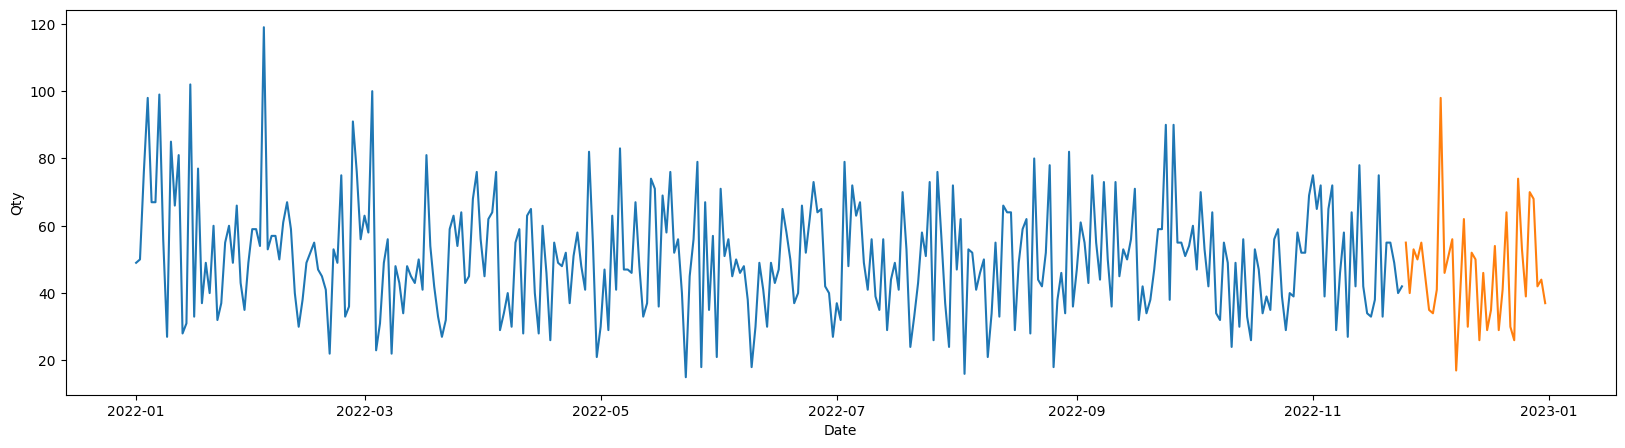

In [23]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_train, x=df_train['Date'], y=df_train['Qty']);
sns.lineplot(data=df_test, x=df_test['Date'], y=df_test['Qty']);

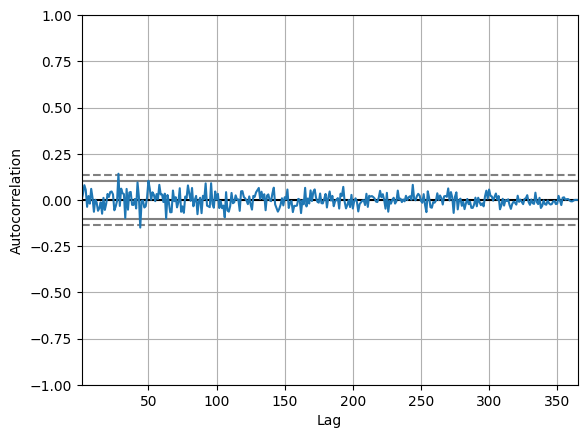

In [24]:
autocorrelation_plot(df_regresi['Qty']);

In [25]:
def rmse(y_actual, y_pred):
    print(f'RMSE Value {mean_squared_error(y_actual, y_pred)**0.5}')

def eval(y_actual, y_pred):
    print(f'MAE Value {mean_absolute_error(y_actual, y_pred)}')

MAE Value 12.440102468204135


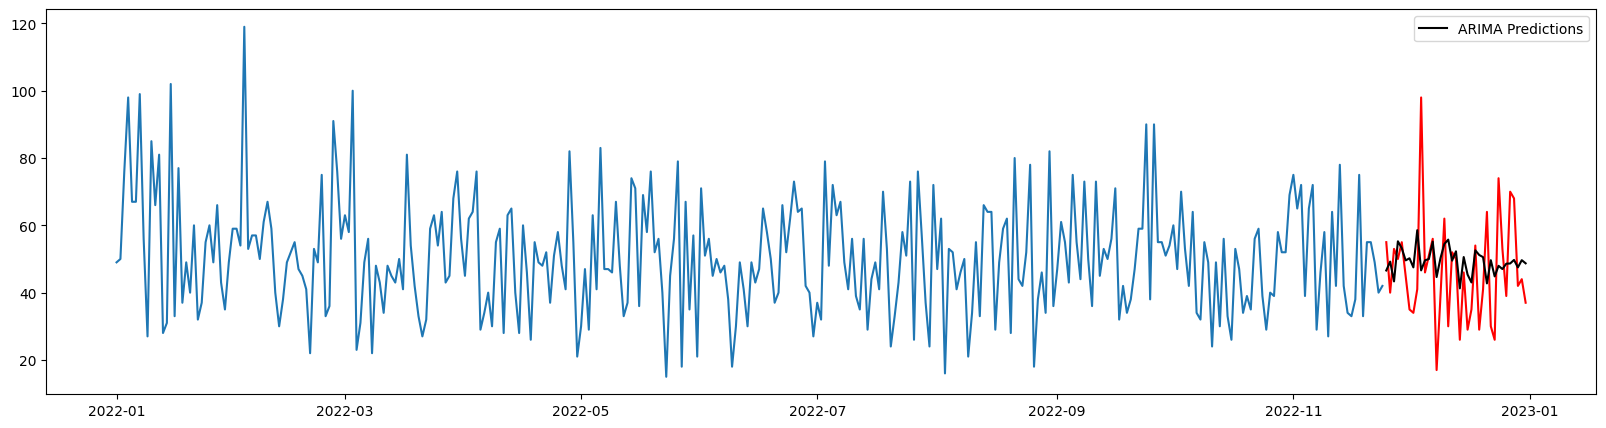

In [26]:
#ARIMA
df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')

y = df_train['Qty']

ARIMAmodel = ARIMA(y, order = (40, 2, 1))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = ARIMAmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']
eval(df_test['Qty'], y_pred_out)

plt.figure(figsize=(20,5))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_out, color='black', label = 'ARIMA Predictions')
plt.legend()

In [27]:
#CLUSTERING

In [28]:
df_merge.head()

TransactionID  CustomerID       Date ProductID  Price  Qty  TotalAmount  \
0       TR11369         328 2022-01-01        P3   7500    4        30000   
1       TR89318         183 2022-07-17        P3   7500    1         7500   
2        TR9106         123 2022-09-26        P3   7500    4        30000   
3        TR4331         335 2022-08-01        P3   7500    3        22500   
4        TR6445         181 2022-10-01        P3   7500    4        30000   

   StoreID  Age  Gender Marital Status  Income Product Name       StoreName  \
0       12   36       0        Married   10.53     Crackers  Prestasi Utama   
1       12   27       1         Single    0.18     Crackers  Prestasi Utama   
2       12   34       0        Married    4.36     Crackers  Prestasi Utama   
3       12   29       1         Single    4.74     Crackers  Prestasi Utama   
4       12   33       1        Married    9.94     Crackers  Prestasi Utama   

  GroupStore           Type  Latitude   Longitude  
0   Prestasi  General Trade -2.990934  104.756554  
1   Prestasi  General Trade -2.990934  104.756554  
2   Prestasi  General Trade -2.990934  104.756554  
3   Prestasi  General Trade -2.990934  104.756554  
4   Prestasi  General Trade -2.990934  104.756554

In [29]:
df_cluster = df_merge.groupby(['CustomerID']).agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

In [39]:
df_cluster.head()

CustomerID  TransactionID  Qty  TotalAmount  cluster_label
0           1             17   60       623300              0
1           2             13   57       392300              3
2           3             15   56       446200              3
3           4             10   46       302500              1
4           5              7   27       268600              0

In [31]:
data_cluster = df_cluster.drop(columns=['CustomerID'])

In [32]:
data_cluster_normalize = preprocessing.normalize(data_cluster)

In [33]:
data_cluster_normalize

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.06539507e-05, 1.15803814e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.95925334e-05, 9.56066465e-05, 9.99999995e-01]])

In [34]:
K = range(2,8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(data_cluster_normalize)

    fits.append(model)

    score.append(silhouette_score(data_cluster_normalize, model.labels_, metric='euclidean'))

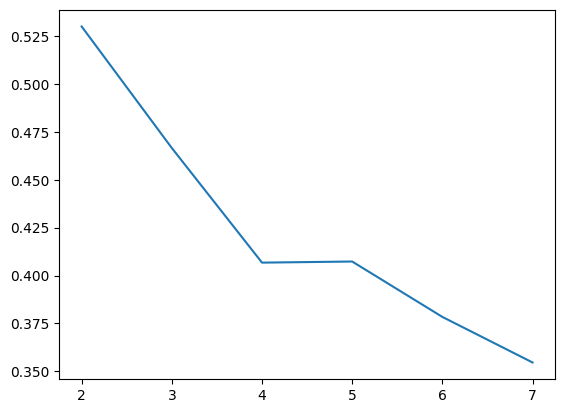

In [35]:
#choose 4 cluster
sns.lineplot(x = K, y = score);

In [37]:
df_cluster['cluster_label'] = fits[2].labels_

In [38]:
df_cluster.groupby(['cluster_label']).agg({
    'CustomerID' : 'count',
    'TransactionID' : 'mean',
    'Qty' : 'mean',
    'TotalAmount' : 'mean'
})

CustomerID  TransactionID        Qty    TotalAmount
cluster_label                                                     
0                     128      11.601562  40.007812  418542.187500
1                      28       9.250000  35.142857  225110.714286
2                     156      11.628205  42.775641  383731.410256
3                     135      10.829630  40.874074  313365.925926